In [21]:
import pandas as pd
import re

# === Load COMET file ===
comet = pd.read_csv(r"Comet_Planner_Seven_Counties.csv")

# === Normalize county names ===
def normalize_county(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = re.sub(r'\bcounty\b', '', s, flags=re.IGNORECASE).strip()
    return s.title()

comet["_county_norm"] = comet["county"].apply(normalize_county)

# === Filter: Hennepin County ONLY ===
comet = comet[comet["_county_norm"] == "Hennepin"]

# === Convert GHG column to numeric ===
ghg_col = "total_ghg_co2"
comet[ghg_col] = pd.to_numeric(
    comet[ghg_col].astype(str).str.replace(",", ""),
    errors="coerce"
)

# === Save filtered data ===
comet.to_csv("Comet_Planner_Hennepin_County.csv", index=False)

print("New file created: Comet_Planner_Hennepin_County.csv")



New file created: Comet_Planner_Hennepin_County.csv


In [29]:
import pandas as pd

csv_path = r"CroplandCROS_AOI_Data.csv"
df = pd.read_csv(csv_path)

df.head()
total_area = df["Area (acres)"].sum()
print(f"Total area: {total_area:,.2f} acres")


Total area: 24,216.10 acres


In [18]:
import pandas as pd
import numpy as np

# Your overlap cropland area (acres)
ACRES = 26787.24

# Load COMET-Planner CSV
csv_path = r"Comet_Planner_Hennepin_County.csv"
df = pd.read_csv(csv_path)

# Keep only Cropland Management rows
cm = df[df["class"].str.contains("Cropland Management", na=False)].copy()

# Replace COMET missing flags
for c in ["total_ghg_co2", "total_ghg_co2_min", "total_ghg_co2_max"]:
    cm[c] = cm[c].replace(-999, np.nan)

# Total GHG (CO2e) for YOUR cropland area
cm["total_ghg_for_acres"] = cm["total_ghg_co2"] * ACRES
cm["total_ghg_for_acres_min"] = cm["total_ghg_co2_min"] * ACRES
cm["total_ghg_for_acres_max"] = cm["total_ghg_co2_max"] * ACRES

# Show top practices by total benefit for your acres
out = (cm.dropna(subset=["total_ghg_for_acres"])
         .sort_values("total_ghg_for_acres", ascending=False)
         [["cpsnum","cps_name","planner_implementation","total_ghg_co2","total_ghg_for_acres",
           "total_ghg_for_acres_min","total_ghg_for_acres_max"]]
      )

out.head(10)


,cpsnum,cps_name,planner_implementation,total_ghg_co2,total_ghg_for_acres,total_ghg_for_acres_min,total_ghg_for_acres_max
19,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.354224,36275.917623,5272.688699,51472.905462
29,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.256759,33665.118268,5313.732162,48357.787481
17,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.253209,33570.012316,4695.458206,46741.199807
15,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.165742,31227.010893,4195.485943,42417.787864
27,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.150879,30828.882940,4716.893141,43424.905315
20,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.131100,30299.034601,251.306956,44025.232409
30,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.061972,28447.287426,251.306956,42424.312244
25,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.059073,28369.652593,4160.814174,38938.141192
13,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.057520,28328.034678,3554.397429,37581.743150
18,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.052547,28194.838074,251.306956,40539.765781


In [3]:
out.to_csv(
    "Cropland_Management_All_COMET.csv",
    index=False
)


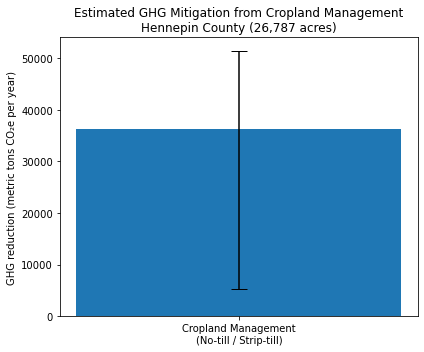

In [4]:
import matplotlib.pyplot as plt

# Your COMET-Planner results
ghg_central = 36275.92   # total_ghg_for_acres
ghg_min = 5272.69
ghg_max = 51472.91

# Error bars
lower_err = ghg_central - ghg_min
upper_err = ghg_max - ghg_central

plt.figure(figsize=(6,5))

plt.bar(
    ["Cropland Management\n(No-till / Strip-till)"],
    [ghg_central],
    yerr=[[lower_err], [upper_err]],
    capsize=8
)

plt.ylabel("GHG reduction (metric tons CO₂e per year)")
plt.title("Estimated GHG Mitigation from Cropland Management\nHennepin County (26,787 acres)")

plt.tight_layout()
plt.show()


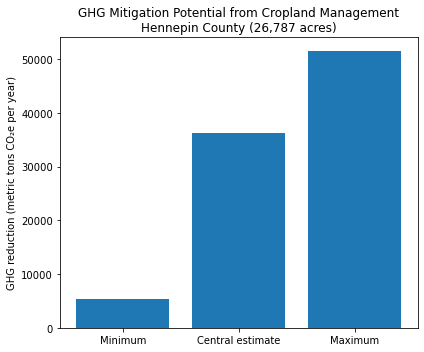

In [5]:
import matplotlib.pyplot as plt

labels = ["Minimum", "Central estimate", "Maximum"]
values = [5272.69, 36275.92, 51472.91]

plt.figure(figsize=(6,5))
plt.bar(labels, values)

plt.ylabel("GHG reduction (metric tons CO₂e per year)")
plt.title("GHG Mitigation Potential from Cropland Management\nHennepin County (26,787 acres)")

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load your uploaded file
csv_path = r"Cropland_Management_All_COMET.csv"
df = pd.read_csv(csv_path)

df.head()


,cpsnum,cps_name,planner_implementation,total_ghg_co2,total_ghg_for_acres,total_ghg_for_acres_min,total_ghg_for_acres_max
0,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.354224,36275.917623,5272.688699,51472.905462
1,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.256759,33665.118268,5313.732162,48357.787481
2,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.253209,33570.012316,4695.458206,46741.199807
3,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.165742,31227.010893,4195.485943,42417.787864
4,888,Multiple Conservation Practices,Intensive Till to No Till or Strip Till (CPS 3...,1.150879,30828.882940,4716.893141,43424.905315


In [7]:
df["planner_implementation"].unique()


array(['Intensive Till to No Till or Strip Till (CPS 329) + Add Legume Seasonal Cover Crop (CPS 340) + Replace Synthetic N Fertilizer with Compost (CN ratio 25) (CPS 590) on Irrigated Croplands',
       'Intensive Till to No Till or Strip Till (CPS 329) + Add Non-Legume Seasonal Cover Crop (CPS 340) + Replace Synthetic N Fertilizer with Compost (CN ratio 25) (CPS 590) on Irrigated Croplands',
       'Intensive Till to No Till or Strip Till (CPS 329) + Add Legume Seasonal Cover Crop (CPS 340) + Replace Synthetic N Fertilizer with Compost (CN ratio 20) (CPS 590) on Irrigated Croplands',
       'Intensive Till to No Till or Strip Till (CPS 329) + Add Legume Seasonal Cover Crop (CPS 340) + Replace Synthetic N Fertilizer with Compost (CN ratio 15) (CPS 590) on Irrigated Croplands',
       'Intensive Till to No Till or Strip Till (CPS 329) + Add Non-Legume Seasonal Cover Crop (CPS 340) + Replace Synthetic N Fertilizer with Compost (CN ratio 20) (CPS 590) on Irrigated Croplands',
       'Inte

In [8]:
practice_ghg = (
    df
    .groupby("planner_implementation")
    .agg(
        ghg_median=("total_ghg_for_acres", "median"),
        ghg_min=("total_ghg_for_acres_min", "median"),
        ghg_max=("total_ghg_for_acres_max", "median")
    )
    .reset_index()
)


In [9]:
practice_ghg = practice_ghg.sort_values(
    "ghg_median", ascending=False
)

practice_ghg


,planner_implementation,ghg_median,ghg_min,ghg_max
23,Intensive Till to No Till or Strip Till (CPS 3...,36275.917623,5272.688699,51472.905462
33,Intensive Till to No Till or Strip Till (CPS 3...,33665.118268,5313.732162,48357.787481
21,Intensive Till to No Till or Strip Till (CPS 3...,33570.012316,4695.458206,46741.199807
19,Intensive Till to No Till or Strip Till (CPS 3...,31227.010893,4195.485943,42417.787864
31,Intensive Till to No Till or Strip Till (CPS 3...,30828.882940,4716.893141,43424.905315
...,...,...,...,...
48,Replace Synthetic N Fertilizer with Chicken La...,1490.463517,-496.348779,5413.781003
46,Replace Synthetic N Fertilizer with Chicken Br...,1490.463517,-496.348779,5413.781003
13,Improved N Fertilizer Management on Irrigated ...,424.932230,NaN,NaN
12,Improved Farm Equipment Fuel Efficiency,325.351093,NaN,NaN


In [10]:
practice_ghg.to_csv(
    "Hennepin_GHG_by_Conservation_Practice.csv",
    index=False
)


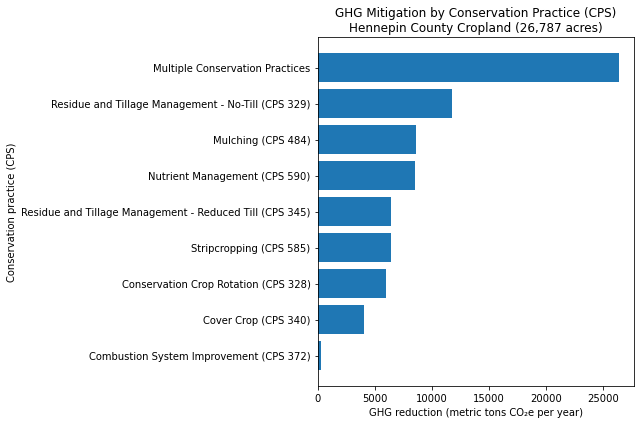

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
csv_path = "Cropland_Management_All_COMET.csv"
df = pd.read_csv(csv_path)

# Aggregate GHG by CPS NAME (use median to avoid extremes)
cps_ghg = (
    df.groupby("cps_name")["total_ghg_for_acres"]
      .median()
      .reset_index()
      .sort_values("total_ghg_for_acres", ascending=False)
)

# Plot bar chart
plt.figure(figsize=(9,6))

plt.barh(
    cps_ghg["cps_name"],
    cps_ghg["total_ghg_for_acres"]
)

plt.xlabel("GHG reduction (metric tons CO₂e per year)")
plt.ylabel("Conservation practice (CPS)")
plt.title(
    "GHG Mitigation by Conservation Practice (CPS)\n"
    "Hennepin County Cropland (26,787 acres)"
)

plt.gca().invert_yaxis()   # highest impact on top
plt.tight_layout()
plt.show()
